## Satelite data retrieval for MHW analysis
Script to get SST data from AWS 
Script largely copied from `Access_cloud_SST_data_examples.ipynb`

Will extract three points (First), hopefully some regions (next)

### 1. Import libraries:

In [1]:
# filter some warning messages
import warnings 
warnings.filterwarnings("ignore") 

#libraries
import datetime as dt
import xarray as xr
import fsspec
import s3fs
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
# make datasets display nicely
xr.set_options(display_style="html")  

#magic fncts #put static images of your plot embedded in the notebook
%matplotlib inline  
plt.rcParams['figure.figsize'] = 12, 6
%config InlineBackend.figure_format = 'retina' 

### 2. Get Zarr SST from AWS

In [2]:
%%time 

file_location = 's3://mur-sst/zarr' # from amazon cloud

ikey = fsspec.get_mapper(file_location, anon=True)

ds_sst = xr.open_zarr(ikey,consolidated=True)

ds_sst

CPU times: user 7.09 s, sys: 322 ms, total: 7.41 s
Wall time: 28.7 s


,Array,Chunk
Bytes,16.70 TB,257.72 MB
Shape,"(6443, 17999, 36000)","(6443, 100, 100)"
Count,64801 Tasks,64800 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,16.70 TB,257.72 MB
Shape,"(6443, 17999, 36000)","(6443, 100, 100)"
Count,64801 Tasks,64800 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


### 3. Get data from a couple of (lat/long) point: 

From above - data are available from 1 June 2002 to 20 Jan 2020.

Get the whole data set at three POINTS:

CPU times: user 297 ms, sys: 189 ms, total: 486 ms
Wall time: 1.84 s


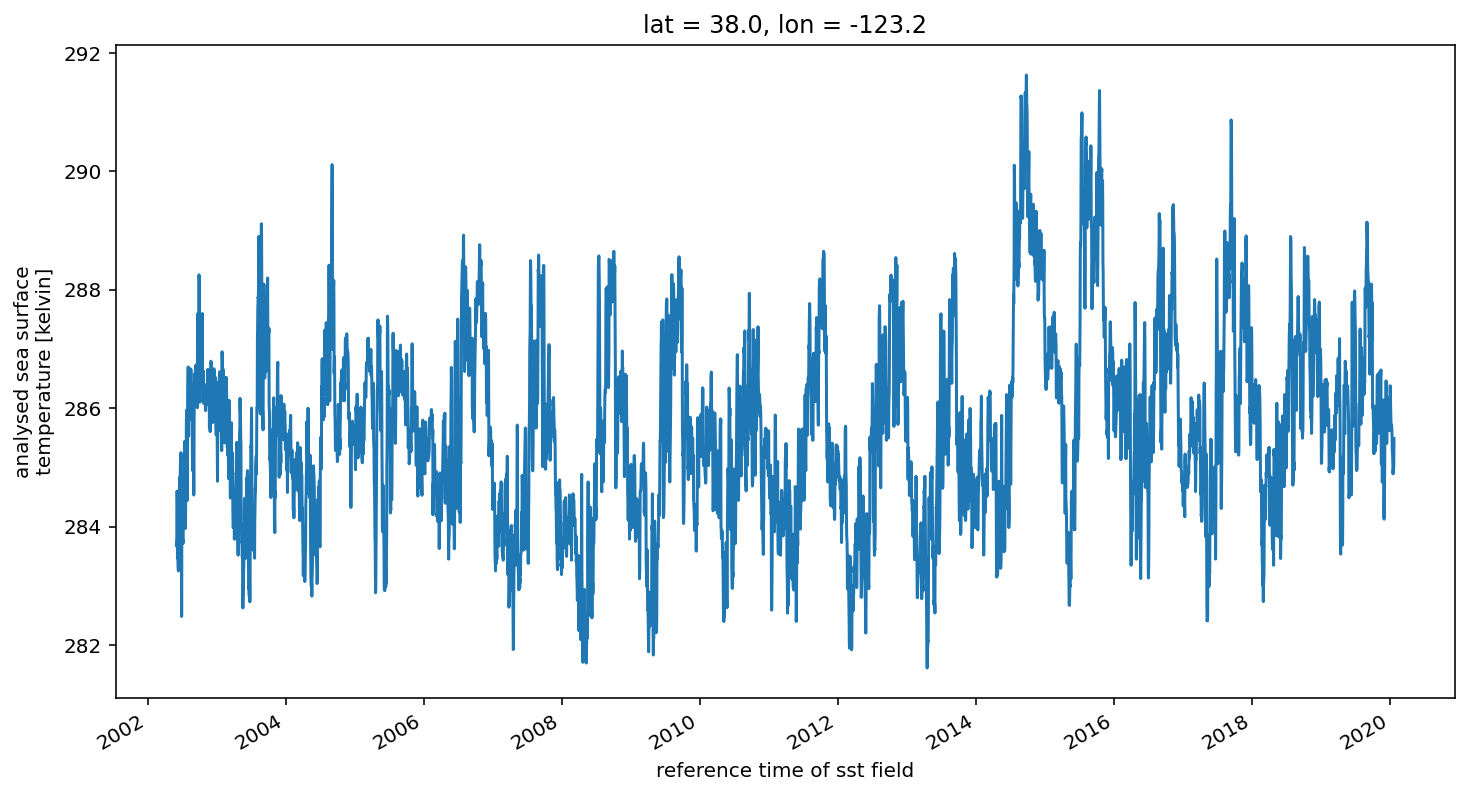

In [6]:
%%time

sst_timeseries_pt_CA = ds_sst['analysed_sst'].sel(time = slice('2002-06-01','2020-01-20'),
                                            lat  = 38,
                                            lon  = -123.2
                                           ).load()

sst_timeseries_pt_CA.plot()

CPU times: user 201 ms, sys: 130 ms, total: 331 ms
Wall time: 598 ms


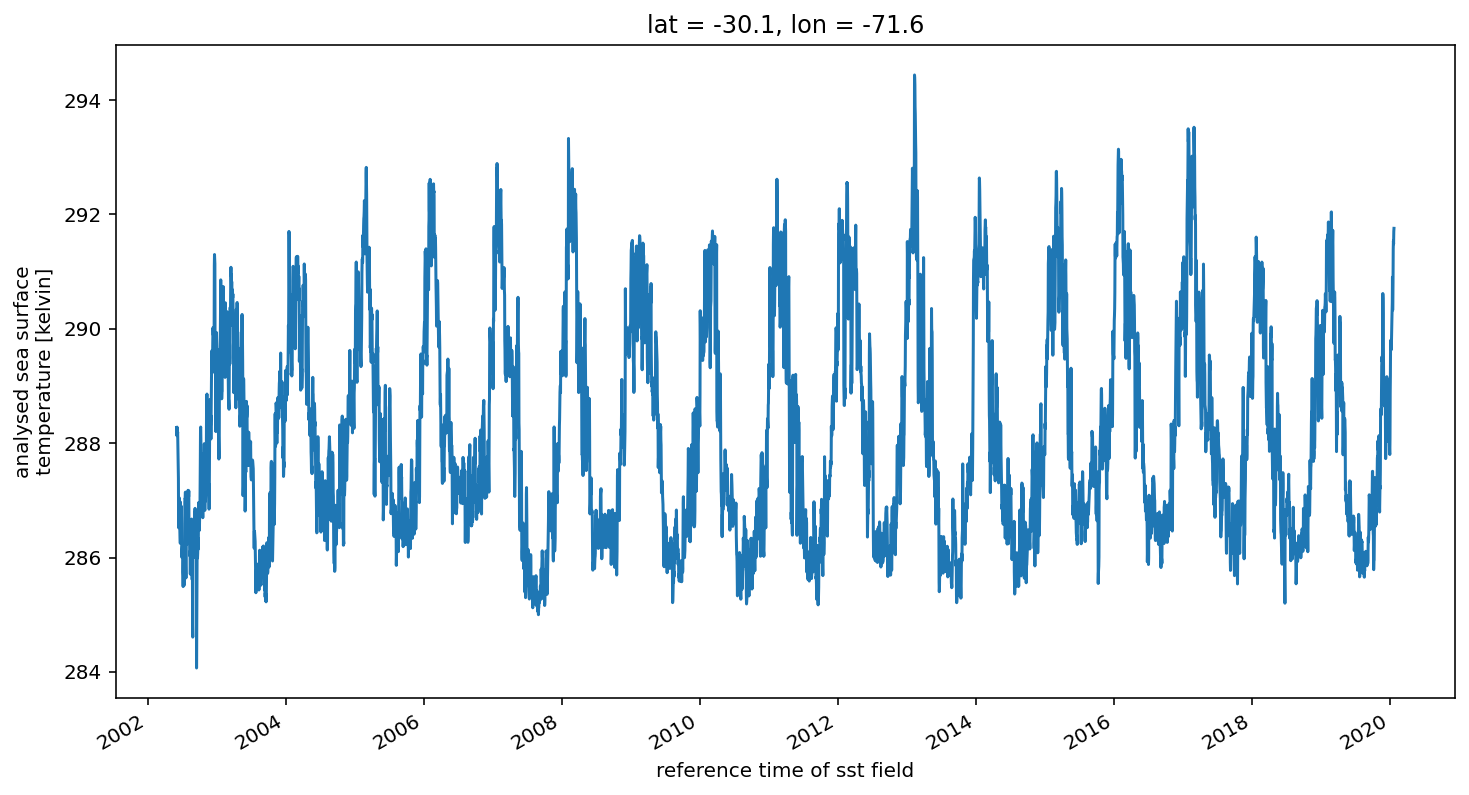

In [7]:
%%time

sst_timeseries_pt_CL = ds_sst['analysed_sst'].sel(time = slice('2002-06-01','2020-01-20'),
                                            lat  = -30.1,
                                            lon  = -71.6
                                           ).load()

sst_timeseries_pt_CL

CPU times: user 296 ms, sys: 196 ms, total: 492 ms
Wall time: 1.79 s


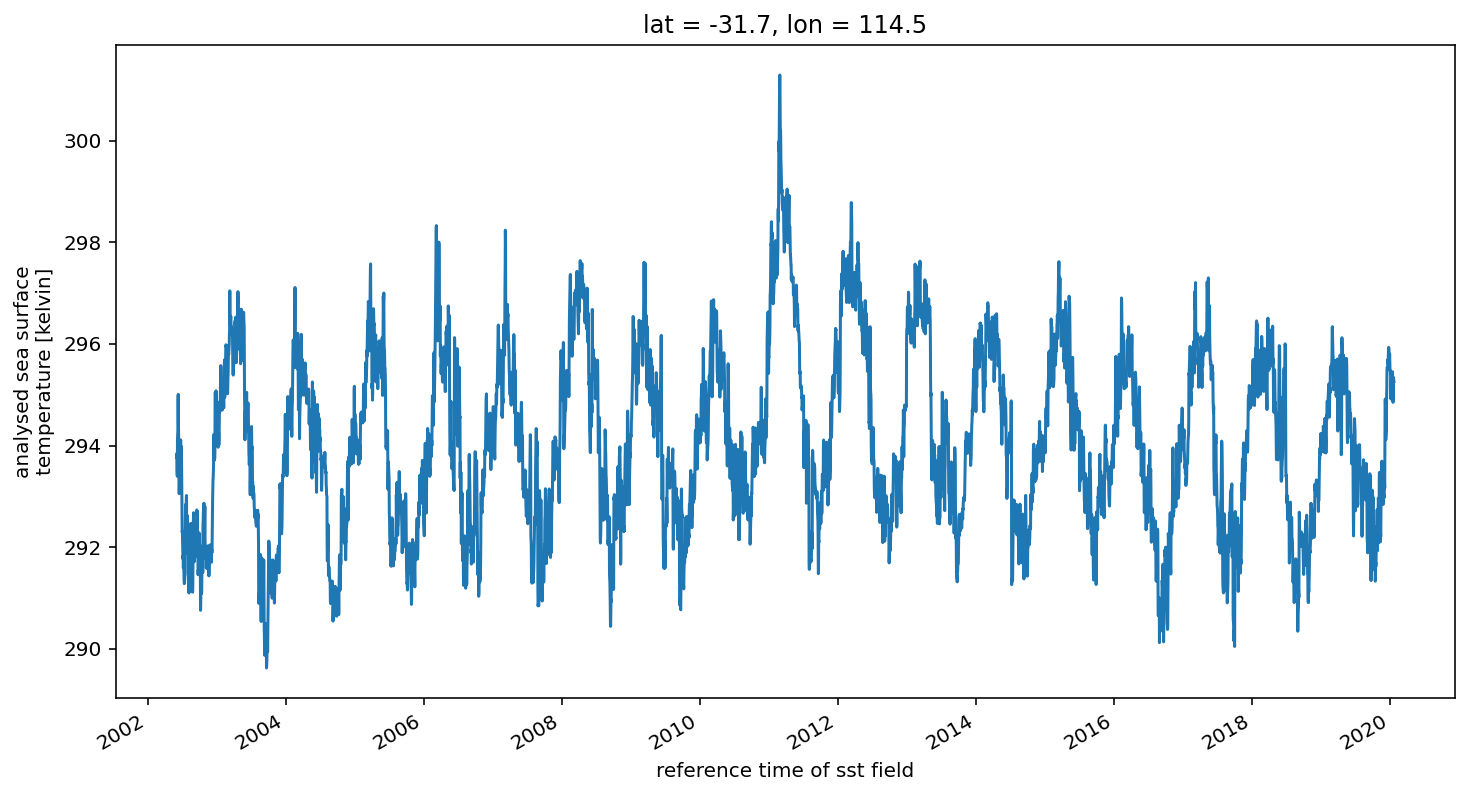

In [8]:
%%time

sst_timeseries_pt_AU = ds_sst['analysed_sst'].sel(time = slice('2002-06-01','2020-01-20'),
                                            lat  = -31.7,
                                            lon  = 114.5
                                           ).load()

sst_timeseries_pt_AU.plot()

### 4. A spatial area instead of a time series:

Get 1 degree around the data points above:

eek.. these are just one point in time.


CPU times: user 2.02 s, sys: 1.64 s, total: 3.66 s
Wall time: 1.89 s


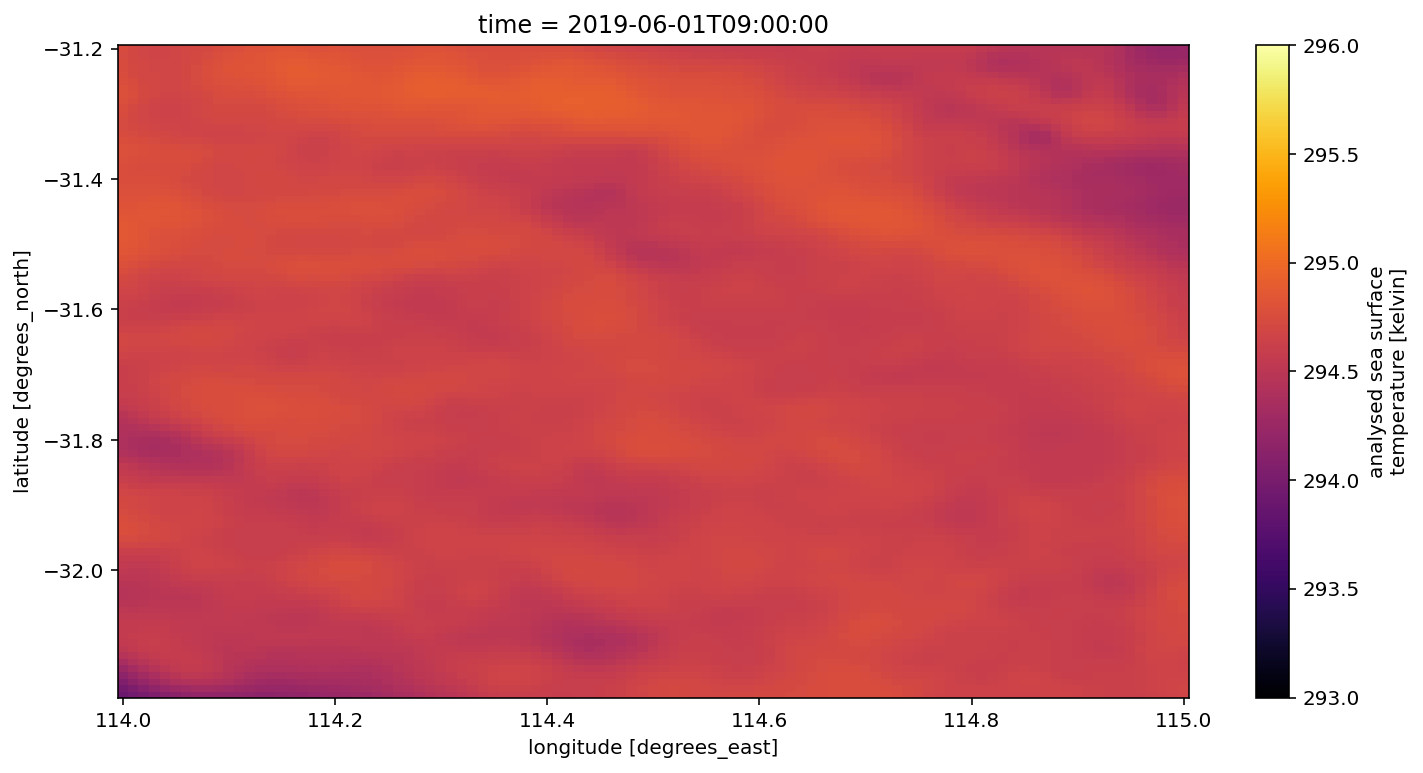

In [12]:
%%time

subset_AUt1 = ds_sst['analysed_sst'].sel(time='2019-06-01',lat=slice(-31.7-.5,-31.7+.5),lon=slice(114.5-.5,114.5+.5))

subset_AUt1.plot(vmin=293,vmax=296,cmap='inferno')

In [23]:
#subset_AU = ds_sst['analysed_sst'].sel(time='2019-06-01',lat=slice(-31.7-.5,-31.7+.5),lon=slice(114.5-.5,114.5+.5))
# subset_AU = ds_sst['analysed_sst'].sel(lat=slice(-31.7-.5,-31.7+.5),lon=slice(114.5-.5,114.5+.5))

# subset_AU

<xarray.DataArray 'analysed_sst' (time: 6443, lat: 100, lon: 101)>
dask.array<getitem, shape=(6443, 100, 101), dtype=float32, chunksize=(6443, 80, 100), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 -32.19 -32.18 -32.17 -32.16 ... -31.22 -31.21 -31.2
  * lon      (lon) float32 114.0 114.01 114.02 114.03 ... 114.98 114.99 115.0
  * time     (time) datetime64[ns] 2002-06-01T09:00:00 ... 2020-01-20T09:00:00
Attributes:
    comment:        "Final" version using Multi-Resolution Variational Analys...
    long_name:      analysed sea surface temperature
    standard_name:  sea_surface_foundation_temperature
    units:          kelvin
    valid_max:      32767
    valid_min:      -32767

Or better 5 degrees around?

In [25]:
%%time

subset_AU = ds_sst['analysed_sst'].sel(lat=slice(-31.7-2.5,-31.7+2.5),lon=slice(114.5-2.5,114.5+2.5))
subset_AU

CPU times: user 1.62 ms, sys: 0 ns, total: 1.62 ms
Wall time: 1.64 ms


<xarray.DataArray 'analysed_sst' (time: 6443, lat: 500, lon: 501)>
dask.array<getitem, shape=(6443, 500, 501), dtype=float32, chunksize=(6443, 100, 100), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 -34.19 -34.18 -34.17 -34.16 ... -29.22 -29.21 -29.2
  * lon      (lon) float32 112.0 112.01 112.02 112.03 ... 116.98 116.99 117.0
  * time     (time) datetime64[ns] 2002-06-01T09:00:00 ... 2020-01-20T09:00:00
Attributes:
    comment:        "Final" version using Multi-Resolution Variational Analys...
    long_name:      analysed sea surface temperature
    standard_name:  sea_surface_foundation_temperature
    units:          kelvin
    valid_max:      32767
    valid_min:      -32767

CPU times: user 8.67 s, sys: 9.44 s, total: 18.1 s
Wall time: 14.6 s


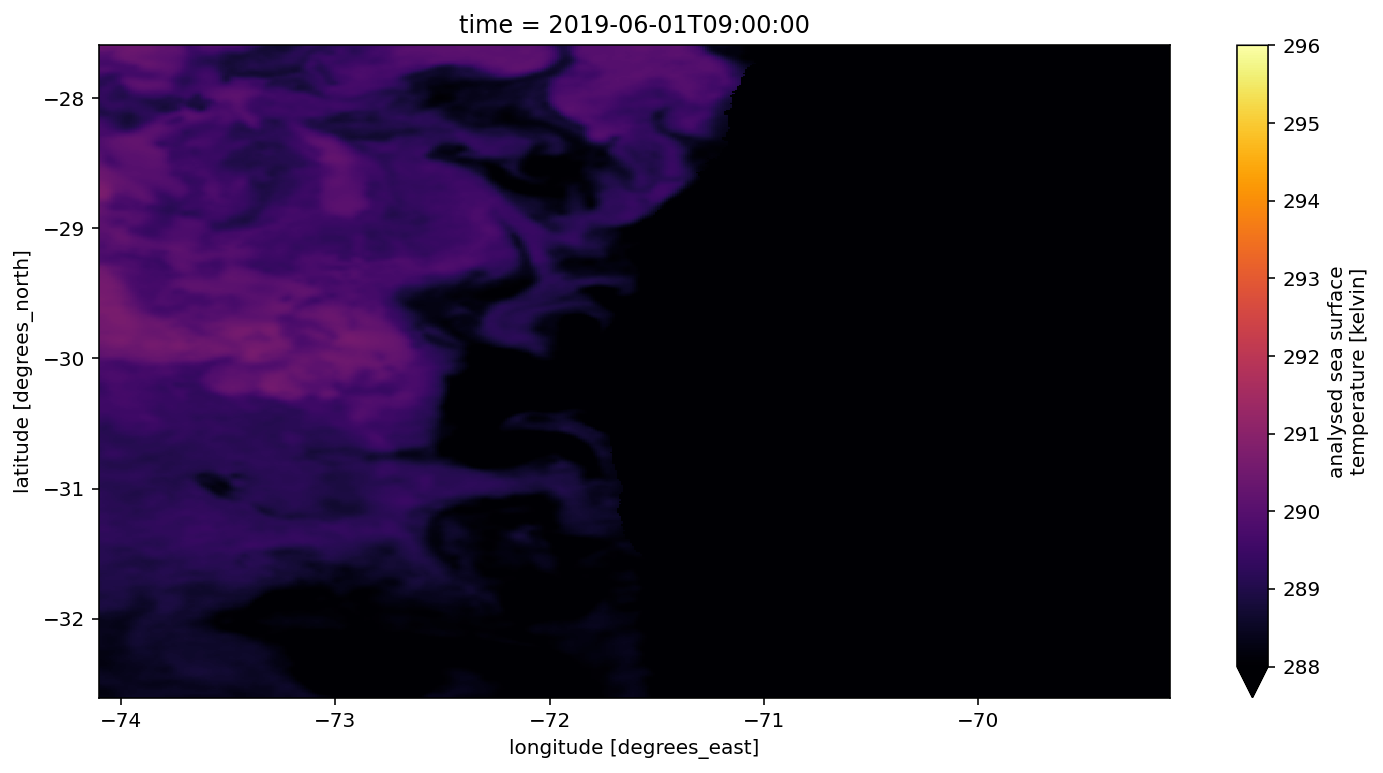

In [17]:
%%time

subset_CLt1 = ds_sst['analysed_sst'].sel(time='2019-06-01',lat=slice(-30.1-2.5,-30.1+2.5),lon=slice(-71.6-2.5,-71.6+2.5))
subset_CLt1.plot(vmin=288,vmax=296,cmap='inferno')

In [ ]:
%%time

# for all times!
subset_CL = ds_sst['analysed_sst'].sel(lat=slice(-30.1-2.5,-30.1+2.5),lon=slice(-71.6-2.5,-71.6+2.5))
subset_CL.plot(vmin=288,vmax=296,cmap='inferno')